<a href="https://colab.research.google.com/github/kareemullah123456789/1112232/blob/master/ML_Model_Regression_using_MLlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=641332dbfe08e9efa6ef7bc7664610dca15233ae666c2235a309eeec2c4862ea
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [2]:
import os
os.environ["JAVA_HOME"]="/lib/jvm/java-11-openjdk-amd64"

In [3]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext

In [9]:
import os
cpu =os.cpu_count()
print(cpu)

2


In [13]:
!cat /proc/cpuinfo


processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad

In [4]:
conf = SparkConf().set('spark.ui.port', '4050').setAppName("films").setMaster("local[*]")
sc = SparkContext.getOrCreate(conf=conf)
sqlContext = SQLContext(sc)
#sc.stop()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls /content/drive/MyDrive/learningsparkdata/

births_train.csv  births_train.csv.gz  Boston.csv  ccFraud.csv	ccFraud.csv.gz	sample_data.csv


In [8]:
house_df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('/content/drive/MyDrive/learningsparkdata/Boston.csv')
house_df.show()

+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|_c0|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|
+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|  1|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|  2|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|  3|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|  4|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|  5|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|  6|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|  7|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|  8|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|  9|0.21124|12.5| 7.

In [14]:
## Printing schema
house_df.cache()
house_df.printSchema()


root
 |-- _c0: integer (nullable = true)
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [15]:
## Descriptive analysis
house_df.toPandas()

,_c0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


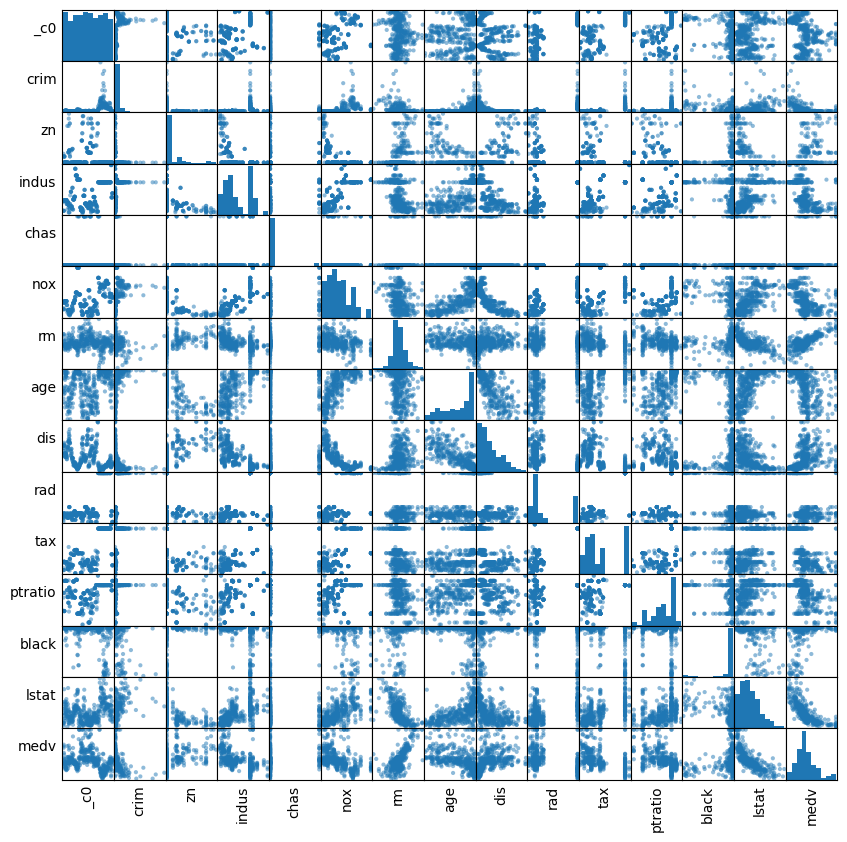

In [16]:
import pandas as pd
from matplotlib import cm
from pandas.plotting import scatter_matrix
numeric_features = [t[0] for t in house_df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = house_df.select(numeric_features).sample(False, 0.8).toPandas()
axs = scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [17]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(house_df)
vhouse_df = vhouse_df.select(['features', 'medv'])


In [18]:
vhouse_df

DataFrame[features: vector, medv: double]

In [19]:
vhouse_df.show(3)

+--------------------+----+
|            features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
+--------------------+----+
only showing top 3 rows



In [22]:
#vhouse_df.collect()

In [23]:
import six
for i in house_df.columns:
    if not( isinstance(house_df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to medv for ", i, house_df.stat.corr('medv',i))

Correlation to medv for  _c0 -0.22660364293533927
Correlation to medv for  crim -0.38830460858681154
Correlation to medv for  zn 0.3604453424505433
Correlation to medv for  indus -0.4837251600283728
Correlation to medv for  chas 0.1752601771902987
Correlation to medv for  nox -0.4273207723732821
Correlation to medv for  rm 0.6953599470715401
Correlation to medv for  age -0.3769545650045961
Correlation to medv for  dis 0.249928734085904
Correlation to medv for  rad -0.38162623063977735
Correlation to medv for  tax -0.46853593356776674
Correlation to medv for  ptratio -0.5077866855375622
Correlation to medv for  black 0.3334608196570661
Correlation to medv for  lstat -0.7376627261740145
Correlation to medv for  medv 1.0


In [25]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]
#train_df,test_df=vhouse_df.randomSplit([0.7,0.3])

In [26]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='medv', maxIter=10)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.12288848973464898,0.05074825635152629,0.07134246559218725,2.099384006720847,-19.843280265636448,3.81636536370126,0.023502778940666814,-1.3243156225364103,0.33175037919620404,-0.013711457335926651,-1.1062893086597212,0.009094097889490737,-0.5267267101331597]
Intercept: 38.21010758732191


In [27]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 4.760454
r2: 0.746751


In [28]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","medv","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="medv",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 31.47231295542321|29.1|[0.01439,60.0,2.9...|
| 38.01977795018881|44.0|[0.01538,90.0,3.7...|
| 30.38523177267161|32.9|[0.01778,95.0,1.4...|
|20.421568590584094|20.1|[0.01965,80.0,1.7...|
|22.071511467788074|16.5|[0.02498,0.0,1.89...|
+------------------+----+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.714836


In [29]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 0
objectiveHistory: [0.0]
+-------------------+
|          residuals|
+-------------------+
| -6.153729437237061|
|0.33442748252556953|
| -5.687720395137749|
| 1.9167170950167325|
|  4.047009796151116|
| 3.8041556628602073|
|  8.826272196309318|
|-2.4974543092772663|
|-3.3302509984833684|
|  5.465718215856519|
|  3.436801737750784|
|-2.3502642393835096|
|  8.974079211913804|
|  6.376388133947827|
|-0.5731035527410206|
|  5.300932434129159|
|-0.7194528784647645|
|  3.913652228594863|
| -3.844834870106169|
|  4.750597570030653|
+-------------------+
only showing top 20 rows



In [ ]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","medv","features").show()

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 27.73619480353222|22.0|[0.01096,55.0,2.2...|
|25.918153891765243|30.1|[0.01709,90.0,2.0...|
|31.014350767064446|32.9|[0.01778,95.0,1.4...|
| 31.35915379210034|31.1|[0.02187,60.0,2.9...|
|27.789719126915646|23.9|[0.02543,55.0,3.7...|
| 29.26232640785991|30.8|[0.02763,75.0,2.9...|
|27.043208341573887|25.0|[0.02875,28.0,15....|
|25.409928237665433|26.6|[0.02899,40.0,1.2...|
| 19.76077301272168|18.5|[0.03041,0.0,5.19...|
| 29.58499242407223|33.4|[0.03237,0.0,2.18...|
| 32.18142236719568|34.9|[0.03359,75.0,2.9...|
|20.395766998830684|19.5|[0.03427,0.0,5.19...|
|28.599404967980284|24.1|[0.03445,82.5,2.0...|
| 37.96912723168561|48.5|[0.0351,95.0,2.68...|
|22.822289706863266|20.9|[0.03548,80.0,3.6...|
| 28.72242512495242|27.9|[0.03615,80.0,4.9...|
|22.775049889511184|20.7|[0.03738,0.0,5.19...|
| 26.07529515906109|23.2|[0.03871,52.5,5.3...|
|27.249209499

## Decision tree regression

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'medv')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 4.72301


In [ ]:
lr_evaluator.evaluate(dt_predictions)

0.7412971779552553

In [ ]:
dt_model.featureImportances

SparseVector(13, {0: 0.0148, 2: 0.0027, 3: 0.0094, 4: 0.0089, 5: 0.6354, 7: 0.0388, 9: 0.0072, 10: 0.038, 11: 0.0029, 12: 0.242})

In [ ]:
house_df.take(1)

[Row(_c0=1, crim=0.00632, zn=18.0, indus=2.31, chas=0, nox=0.538, rm=6.575, age=65.2, dis=4.09, rad=1, tax=296, ptratio=15.3, black=396.9, lstat=4.98, medv=24.0)]

## Gradient-boosted tree regression

In [ ]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'medv', maxIter=10)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'medv', 'features').show(5)

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 20.66696084176724|22.0|[0.01096,55.0,2.2...|
|  33.0721830507196|30.1|[0.01709,90.0,2.0...|
|34.625351588448396|32.9|[0.01778,95.0,1.4...|
|24.114463807082725|31.1|[0.02187,60.0,2.9...|
| 26.69383363147453|23.9|[0.02543,55.0,3.7...|
+------------------+----+--------------------+
only showing top 5 rows



In [ ]:
gbt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 4.78316
